In [1]:
!pip install deap

In [2]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt

In [18]:
params = []
fitnesses = []

def fitness(individual):
    x = individual[0]
    y = 0.02 * x + 0.5 * np.sin(1 * x + 0.1) + 0.75 * np.cos(0.25 * x - 0.3)

    # Log the parameters and fitness for plotting
    params.append(x)
    fitnesses.append(y)

    return y,

# Define the individual and the population
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 20)  # Create random numbers between 0 and 20
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function
toolbox.register("evaluate", fitness)

# Make decorator to keep mutation within bounds
def checkBounds(min, max):
    def decorator(func):
        def wrapper(*args, **kargs):
            offspring = func(*args, **kargs)
            for child in offspring:
                for i in range(len(child)):
                    if child[i] > max:
                        child[i] = max
                    elif child[i] < min:
                        child[i] = min
            return offspring
        return wrapper
    return decorator

toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=3, indpb=1)  # Gaussian mutation
toolbox.decorate("mutate", checkBounds(0, 20))  # Keep mutation within bounds
toolbox.register("mate", tools.cxUniform, indpb=0.5)  # indpb is the probability of each attribute to be exchanged
toolbox.register("select", tools.selTournament, tournsize=4) # Selection operator

C:\Users\rylie\conda\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\rylie\conda\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [19]:
def main():
    # Create initial population
    pop = toolbox.population(n=16)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Parameters for the mu+lambda algorithm
    mu = len(pop)
    lambda_ = round(0.5*len(pop)) # Offspring is half the size of population

    pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu, lambda_, cxpb=0, mutpb=1,  # mutpb, cxpb is the mutation and crossover probability
                                         ngen=4, stats=stats, halloffame=hof, verbose=True)

    return pop, log, hof

pop, log, hof = main()

# Print best individual
best_ind = (hof[0][0], hof[0].fitness.values[0])
print("Best individual is: %s\nWith fitness: %s" % best_individual)

gen	nevals	avg      	std    	min      	max    
0  	16    	-0.239393	0.64282	-0.836652	1.22287
1  	8     	-0.71627 	0.119104	-0.854692	-0.434619
2  	8     	-0.790607	0.0830298	-0.855931	-0.620771
3  	8     	-0.851697	0.00724757	-0.855931	-0.836652
4  	8     	-0.833447	0.0838845 	-0.855931	-0.508571
5  	8     	-0.853516	0.00682179	-0.855931	-0.827197
Best individual is: 11.08778916223013
With fitness: -0.8570673616280142


In [20]:
# Create plotting variables
x = np.linspace(0, 20, 100)
y = 0.02 * x + 0.5 * np.sin(1 * x + 0.1) + 0.75 * np.cos(0.25 * x - 0.3)

The local minima (x,y) values are: [(4.873, 0.0698), (11.089, -0.8571), (16.871, -0.6743)]

Compare these to the best individual from the genetic algorithm: (11.155217585328622, -0.8559314253393073)


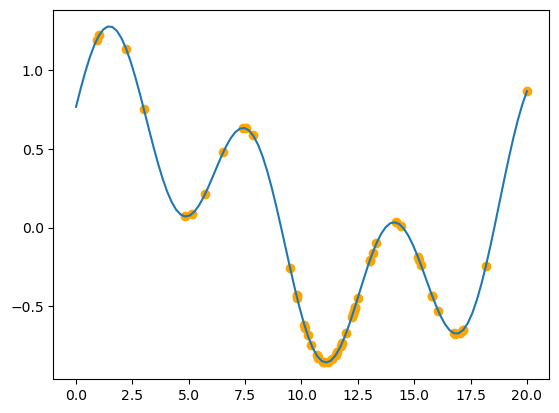

In [22]:
# Visualize
# To see specific generations, slice plt.scatter such as with 
# plt.scatter(params[-8:], fitnesses[-8:], c='orange')
loc_mins = [(4.873, 0.0698), (11.089, -0.8571), (16.871, -0.6743)]
print(f'The local minima (x,y) values are: {loc_mins}')
print(f'\nCompare these to the best individual from the genetic algorithm: {best_ind}')
plt.scatter(params, fitnesses, c='orange')
plt.plot(x,y)
plt.show()